In [ ]:
import pandas as pd
import numpy as np
import re
import gensim
#import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import gensim
from gensim.utils import simple_preprocess
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from sklearn import cluster
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from nltk.cluster import KMeansClusterer, euclidean_distance
import nltk
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import wordpunct_tokenize
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
#import flair
from scipy.spatial import distance
#from simpletransformers.language_representation import RepresentationModel
import requests
from bs4 import BeautifulSoup
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
#import umap.umap_ as umap
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud
#import texthero as hero
from sklearn import metrics
%matplotlib inline

In [ ]:
!pip install -U sentence-transformers
#!pip install "gensim==3.8.1"
#!pip install texthero
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 3.9 MB/s 
     |████████████████████████████████| 4.2 MB 28.9 MB/s 
     |████████████████████████████████| 1.2 MB 53.2 MB/s 
     |████████████████████████████████| 86 kB 7.6 MB/s 
     |████████████████████████████████| 6.6 MB 49.4 MB/s 
     |████████████████████████████████| 596 kB 64.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=e38a3d0267ccf2f0bd5cba14c98966dd100602de553d3882ef2383445f63f22f
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wh

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_train=pd.read_csv('/content/drive/MyDrive/BBC News Train.csv')

In [ ]:
data_train.drop(['ArticleId'],inplace=True,axis=1)

In [ ]:
data_train.head()

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business


In [ ]:
embedder=SentenceTransformer('bert-base-nli-mean-tokens')
def get_embedding(text):
    return embedder.encode(text)
data_train['embedding']=data_train['Text'].apply(get_embedding)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
features=data_train['embedding'].to_list()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(5, n_init=10, random_state=42)
kmeans.fit(features)
data_train['cluster'] = kmeans.labels_

In [ ]:
cluster_to_category = {}
for cat in data_train['Category'].unique():
    mark = data_train['Category'] == cat
    top = data_train[mark]['cluster'].value_counts().head(1)
    count = top.values[0]
    cluster = top.index[0]
    print(f"{cat}:\n Top cluster number: {cluster}, Number of samples: {count}")
    cluster_to_category[cluster] = cat

print("\nMap cluster number to category:")
cluster_to_category

business:
 Top cluster number: 1, Number of samples: 205
tech:
 Top cluster number: 0, Number of samples: 163
politics:
 Top cluster number: 2, Number of samples: 196
sport:
 Top cluster number: 4, Number of samples: 201
entertainment:
 Top cluster number: 4, Number of samples: 145

Map cluster number to category:


{0: 'tech', 1: 'business', 2: 'politics', 4: 'entertainment'}

In [ ]:
data_train['clustered_category'] = data_train['cluster'].map(cluster_to_category)
data_train.head(20)

,Text,Category,embedding,cluster,clustered_category
0,worldcom ex-boss launches defence lawyers defe...,business,"[-0.38721272, 1.084979, -0.3821323, 0.04942719...",3,NaN
1,german business confidence slides german busin...,business,"[-0.90989995, 0.730464, -0.039059915, -0.23986...",1,business
2,bbc poll indicates economic gloom citizens in ...,business,"[-0.78953856, 0.7858665, -0.64425653, -0.00548...",1,business
3,lifestyle governs mobile choice faster bett...,tech,"[-0.13440803, 0.7076208, 0.66272736, 0.0262156...",0,tech
4,enron bosses in $168m payout eighteen former e...,business,"[-0.71415883, 0.55227387, -0.9366001, -0.15856...",1,business
5,howard truanted to play snooker conservative...,politics,"[-0.41936445, 0.7185371, 0.36206454, 0.0368857...",3,NaN
6,wales silent on grand slam talk rhys williams ...,sport,"[-0.15132353, 0.45348868, 1.12498, -0.81015253...",3,NaN
7,french honour for director parker british film...,entertainment,"[-0.3446233, 0.808094, -0.16235518, 0.07457559...",4,entertainment
8,car giant hit by mercedes slump a slump in pro...,business,"[-0.6687437, 0.77440476, -0.77372617, -0.37144...",1,business
9,fockers fuel festive film chart comedy meet th...,entertainment,"[-0.848196, 0.70382655, -0.25610566, -0.083272...",1,business


In [ ]:
print('Overall accuracy of clustered categories:', np.mean(data_train['Category'] == data_train['clustered_category']))

Overall accuracy of clustered categories: 0.47583892617449663


In [ ]:
from sklearn.metrics import silhouette_score
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(features,data_train['cluster']))

Silhouette Coefficient: 0.071


#Bert + Text Preprocess + Kmeans


In [ ]:
import pandas as pd
import numpy as np
import re
import gensim
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import gensim
from gensim.utils import simple_preprocess
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from sklearn import cluster
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from nltk.cluster import KMeansClusterer, euclidean_distance
import nltk
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import wordpunct_tokenize
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
nltk.download('stopwords') 
nltk.download('wordnet')
nltk.download('omw-1.4')
data_train=pd.read_csv('/content/drive/MyDrive/BBC News Train.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


In [ ]:
STOPWORDS = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [ ]:
data_train.drop(['ArticleId'],axis=1,inplace=True)

In [ ]:
def expand_contractions(text):
    expanded_words = []    
    for word in text.split():
        expanded_words.append(contractions.fix(word))   
    expanded_text = ' '.join(expanded_words)
    return expanded_text
 
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
def remove_digits(text):
    return " ".join([word for word in str(text).split() if not(word.isdigit())])
def remove_shorttokens(text):
    return " ".join([word for word in str(text).split() if len(word)>1])
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
#convert it to string
data_train["Text"]=data_train["Text"].astype(str)
#Convert to lower and strip
data_train["Text"]=data_train["Text"].str.lower().str.strip()
#apply contractions
data_train["Text"]=data_train["Text"].apply(lambda x:expand_contractions(x))
#remove punctuations
data_train["Text"]=data_train["Text"].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
#remove stop words
data_train["Text"]=data_train["Text"].apply(lambda x: remove_stopwords(x))
#Lemmatize the sentence
data_train["Text"]=data_train["Text"].apply(lambda text: lemmatize_words(text))
data_train["Text"]=data_train["Text"].apply(lambda text:remove_digits(text))
data_train["Text"]=data_train["Text"].apply(lambda text:remove_shorttokens(text))

In [ ]:
embedder=SentenceTransformer('bert-base-nli-mean-tokens')
def get_embedding(text):
    return embedder.encode(text)
data_train['embedding']=data_train['Text'].apply(get_embedding)

In [ ]:
features=data_train['embedding'].to_list()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(5, n_init=10, random_state=42)
kmeans.fit(features)
data_train['cluster'] = kmeans.labels_

In [ ]:
data_train.head()

,Text,Category,embedding,cluster
0,worldcom exboss launch defence lawyer defendin...,business,"[-0.4309669, 1.057291, -0.4377706, 0.061687537...",2
1,german business confidence slide german busine...,business,"[-0.9869046, 0.8429616, 0.07321085, -0.3633677...",1
2,bbc poll indicates economic gloom citizen majo...,business,"[-0.8343129, 0.90985185, 0.0552425, -0.0078509...",1
3,lifestyle governs mobile choice faster better ...,tech,"[-0.34469008, 0.97843635, 0.77319837, 0.057111...",0
4,enron boss 168m payout eighteen former enron d...,business,"[-0.6388262, 0.87358236, -0.29925334, -0.09436...",1


In [ ]:
cluster_to_category = {}
for cat in data_train['Category'].unique():
    mark = data_train['Category'] == cat
    top = data_train[mark]['cluster'].value_counts().head(1)
    count = top.values[0]
    cluster = top.index[0]
    print(f"{cat}:\n Top cluster number: {cluster}, Number of samples: {count}")
    cluster_to_category[cluster] = cat

print("\nMap cluster number to category:")
cluster_to_category

business:
 Top cluster number: 1, Number of samples: 247
tech:
 Top cluster number: 0, Number of samples: 175
politics:
 Top cluster number: 2, Number of samples: 211
sport:
 Top cluster number: 4, Number of samples: 213
entertainment:
 Top cluster number: 3, Number of samples: 197

Map cluster number to category:


{0: 'tech', 1: 'business', 2: 'politics', 3: 'entertainment', 4: 'sport'}

In [ ]:
data_train['clustered_category'] = data_train['cluster'].map(cluster_to_category)
print('Overall accuracy of clustered categories:', np.mean(data_train['Category'] == data_train['clustered_category']))

Overall accuracy of clustered categories: 0.7


In [ ]:
from sklearn.metrics import silhouette_score
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(features,data_train['cluster']))

Silhouette Coefficient: 0.070


#Experiment with PCA

In [ ]:
data_embbedding=features
x=[]
y=[]
for i in range(768,0,-10):
  pca_2 = PCA(n_components=i)
  pca_2_result = pca_2.fit_transform(data_embbedding)
  x.append(i)
  y.append(round(np.sum(pca_2.explained_variance_ratio_),2))
  print('Cumulative variance explained by {} principal components: {:.2%}'.format(i,np.sum(pca_2.explained_variance_ratio_)))

Cumulative variance explained by 768 principal components: 100.00%
Cumulative variance explained by 758 principal components: 100.00%
Cumulative variance explained by 748 principal components: 100.00%
Cumulative variance explained by 738 principal components: 99.99%
Cumulative variance explained by 728 principal components: 99.99%
Cumulative variance explained by 718 principal components: 99.99%
Cumulative variance explained by 708 principal components: 99.98%
Cumulative variance explained by 698 principal components: 99.98%
Cumulative variance explained by 688 principal components: 99.97%
Cumulative variance explained by 678 principal components: 99.97%
Cumulative variance explained by 668 principal components: 99.96%
Cumulative variance explained by 658 principal components: 99.95%
Cumulative variance explained by 648 principal components: 99.95%
Cumulative variance explained by 638 principal components: 99.94%
Cumulative variance explained by 628 principal components: 99.93%
Cumulat

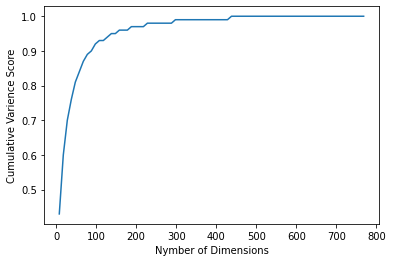

In [ ]:
plt.plot(x,y)
plt.xlabel("Nymber of Dimensions")
plt.ylabel("Cumulative Varience Score")
plt.show()

In [ ]:
#95%,90%,85% covaience-->145,85,65
data_embbedding=features
pca_95 = PCA(n_components=145)
pca_95result = pca_95.fit_transform(data_embbedding)

pca_90 = PCA(n_components=85)
pca_90result = pca_95.fit_transform(data_embbedding)

pca_85 = PCA(n_components=65)
pca_85result = pca_85.fit_transform(data_embbedding)


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(5, n_init=10, random_state=42)
kmeans.fit(pca_95result)
data_train['cluster95'] = kmeans.labels_

kmeans = KMeans(5, n_init=10, random_state=42)
kmeans.fit(pca_90result)
data_train['cluster90'] = kmeans.labels_

kmeans = KMeans(5, n_init=10, random_state=42)
kmeans.fit(pca_85result)
data_train['cluster85'] = kmeans.labels_

In [ ]:
cluster_to_category95= {}
for cat in data_train['Category'].unique():
    mark = data_train['Category'] == cat
    top = data_train[mark]['cluster95'].value_counts().head(1)
    count = top.values[0]
    cluster = top.index[0]
    print(f"{cat}:\n Top cluster number: {cluster}, Number of samples: {count}")
    cluster_to_category95[cluster] = cat

print("\nMap cluster number to category:")
cluster_to_category95

business:
 Top cluster number: 1, Number of samples: 259
tech:
 Top cluster number: 3, Number of samples: 174
politics:
 Top cluster number: 2, Number of samples: 212
sport:
 Top cluster number: 0, Number of samples: 214
entertainment:
 Top cluster number: 4, Number of samples: 201

Map cluster number to category:


{0: 'sport', 1: 'business', 2: 'politics', 3: 'tech', 4: 'entertainment'}

In [ ]:
data_train['clustered_category95'] = data_train['cluster95'].map(cluster_to_category95)

In [ ]:
print('Overall accuracy of clustered categories:', np.mean(data_train['Category'] == data_train['clustered_category95']))

Overall accuracy of clustered categories: 0.7114093959731543


In [ ]:
from sklearn.metrics import silhouette_score
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(pca_95result,data_train['cluster95']))

Silhouette Coefficient: 0.074


In [ ]:
cluster_to_category90= {}
for cat in data_train['Category'].unique():
    mark = data_train['Category'] == cat
    top = data_train[mark]['cluster90'].value_counts().head(1)
    count = top.values[0]
    cluster = top.index[0]
    print(f"{cat}:\n Top cluster number: {cluster}, Number of samples: {count}")
    cluster_to_category90[cluster] = cat

print("\nMap cluster number to category:")
cluster_to_category90

business:
 Top cluster number: 3, Number of samples: 263
tech:
 Top cluster number: 4, Number of samples: 172
politics:
 Top cluster number: 0, Number of samples: 209
sport:
 Top cluster number: 1, Number of samples: 210
entertainment:
 Top cluster number: 2, Number of samples: 195

Map cluster number to category:


{0: 'politics', 1: 'sport', 2: 'entertainment', 3: 'business', 4: 'tech'}

In [ ]:
data_train['clustered_category90'] = data_train['cluster90'].map(cluster_to_category90)

In [ ]:
print('Overall accuracy of clustered categories:', np.mean(data_train['Category'] == data_train['clustered_category90']))

Overall accuracy of clustered categories: 0.7026845637583893


In [ ]:
cluster_to_category85= {}
for cat in data_train['Category'].unique():
    mark = data_train['Category'] == cat
    top = data_train[mark]['cluster85'].value_counts().head(1)
    count = top.values[0]
    cluster = top.index[0]
    print(f"{cat}:\n Top cluster number: {cluster}, Number of samples: {count}")
    cluster_to_category85[cluster] = cat

print("\nMap cluster number to category:")
cluster_to_category85

business:
 Top cluster number: 4, Number of samples: 261
tech:
 Top cluster number: 0, Number of samples: 172
politics:
 Top cluster number: 1, Number of samples: 212
sport:
 Top cluster number: 3, Number of samples: 286
entertainment:
 Top cluster number: 2, Number of samples: 207

Map cluster number to category:


{0: 'tech', 1: 'politics', 2: 'entertainment', 3: 'sport', 4: 'business'}

In [ ]:
data_train['clustered_category85'] = data_train['cluster85'].map(cluster_to_category85)
print('Overall accuracy of clustered categories:', np.mean(data_train['Category'] == data_train['clustered_category85']))

Overall accuracy of clustered categories: 0.763758389261745
